In [3]:
import sys
sys.path.extend(
    ['../generate_sequence/',
    '../lamination_database/']
)
from generate_sequence import get_best_laminate_random
from laminate_db import get_best_laminate
from composipy import OrthotropicMaterial, LaminateProperty, PlateStructure

In [4]:
# #t = 1.016
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 8
r, xi1D, xi3D, nplies = 0.5, -0.47913233, -0.04183533, 8
r, xi1D, xi3D, nplies = 1.0, -0.74205514,  0.48401028, 8
r, xi1D, xi3D, nplies = 1.5, -0.87087838,  0.74165676, 8
r, xi1D, xi3D, nplies = 2.0, -0.94734667,  0.89459334, 8
r, xi1D, xi3D, nplies = 2.5, -0.99798696,  0.99587392, 8

# #t = 1.524
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 12
r, xi1D, xi3D, nplies = 0.5, -0.47913166, -0.04183668, 12
r, xi1D, xi3D, nplies = 1.0, -0.74205532,  0.48401064, 12
r, xi1D, xi3D, nplies = 1.5, -0.87087798,  0.74165596, 12
r, xi1D, xi3D, nplies = 2.0, -0.94734641,  0.89459281, 12
r, xi1D, xi3D, nplies = 2.5, -0.99798689,  0.99587378, 12

# #t = 2.032
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 16
r, xi1D, xi3D, nplies = 0.5, -0.47913146, -0.04183707, 16
r, xi1D, xi3D, nplies = 1.0, -0.74205528,  0.48401057, 16
r, xi1D, xi3D, nplies = 1.5, -0.87087769,  0.74165539, 16
r, xi1D, xi3D, nplies = 2.0, -0.94734671,  0.89459341, 16
r, xi1D, xi3D, nplies = 2.5, -0.99798709,  0.99587418, 16

# #t = 3.048
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 24
r, xi1D, xi3D, nplies = 0.5, -0.47913166, -0.04183667, 24
r, xi1D, xi3D, nplies = 1.0, -0.74205529,  0.48401058, 24
r, xi1D, xi3D, nplies = 1.5, -0.87087768,  0.74165535, 24
r, xi1D, xi3D, nplies = 2.0, -0.94734673,  0.89459346, 24
r, xi1D, xi3D, nplies = 2.5, -0.99798702,  0.99587404, 24

In [5]:
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 12

BEST SOLUTION IS
(0.07909360347351259, [-45, -45, 45, 45, 0, 90, 90, 0, 45, 45, -45, -45])


[-45, -45, 45, 45, 0, 90, 90, 0, 45, 45, -45, -45]

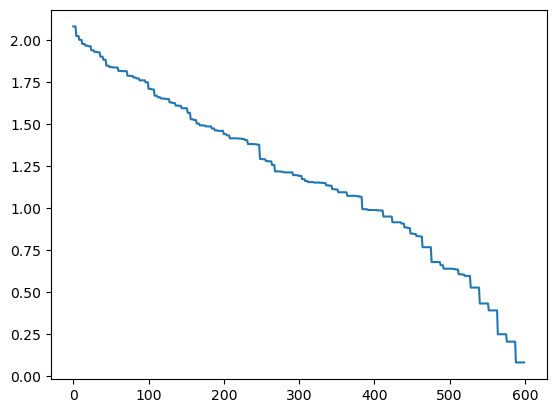

In [6]:
#get_best_laminate_random(xi1D, xi3D, n_plies, n_sequences=500, detailed=False)
t = 0.127
stack = get_best_laminate_random(xi1D, xi3D, nplies, detailed=True)
stack

In [7]:
stack2 = get_best_laminate((xi1D, xi3D), nplies)
stack2

[45, 45, -45, -45, 0, 90, 90, 0, -45, -45, 45, 45]

In [8]:
E1 = 128e3
E2 = 13e3
G12 = 6.4e3
v12 = 0.3
a = 508
b = 254
m = 10
n = 10
panel_constraint = 'PINNED'

Nxx = -1
Nyy = -1 * r
Nxy = -0


In [9]:
mat = OrthotropicMaterial(E1, E2, v12, G12, t)
lam = LaminateProperty(stacking=stack, plies=mat)
plate = PlateStructure(lam, a, b, panel_constraint, Nxx, Nyy, Nxy, m, n)

plate.buckling_analysis()

(array([11.70795479, 13.07474621, 16.05001124, 16.13706372, 20.45084673]),
 array([[ 6.52063992e-01, -4.49416360e-01, -2.56646281e-01,
          6.70473009e-01,  5.94135578e-01],
        [-5.99758992e+00,  4.88527780e+00,  6.06302588e+00,
         -4.34852279e+00, -3.64575124e+00],
        [-8.67724402e-01, -1.04658848e-01,  1.27469041e+00,
          3.75802847e-01,  9.35828737e-01],
        [-3.21317677e+00,  3.36429157e+00,  3.24853285e+00,
         -2.94530454e+00, -3.02268148e+00],
        [-2.55608200e+00,  1.57117452e+00,  2.15674499e+00,
         -1.58586742e+00, -1.02102246e+00],
        [-2.60039348e+00,  2.80939417e+00,  3.14261148e+00,
         -2.13396601e+00, -2.19572244e+00],
        [-1.85632694e+00,  1.01761085e+00,  1.38961326e+00,
         -1.18755291e+00, -6.58979369e-01],
        [-1.39675229e+00,  1.71444261e+00,  1.94461266e+00,
         -1.14212380e+00, -1.33941709e+00],
        [-9.39976602e-01,  4.75990432e-01,  6.21337729e-01,
         -6.41926112e-01, -3.5271

## Contour plot

In [10]:
import matplotlib.pyplot as plt

from composipy.optimize import maximize_buckling_load

generating plot...


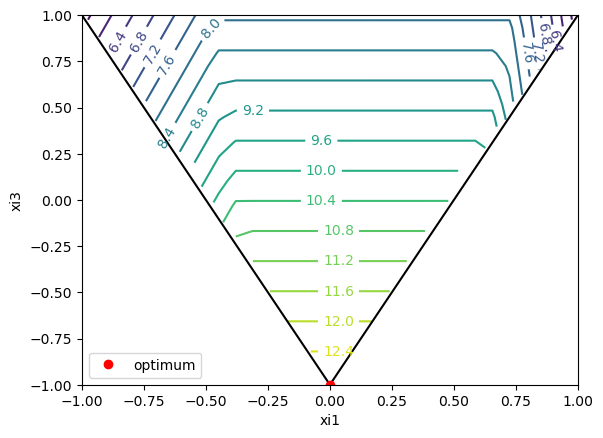

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -12.842366858485487
       x: [ 5.000e-05 -1.000e+00]
     nit: 2
     jac: [-9.775e-05  2.455e+00]
    nfev: 6
    njev: 2

In [11]:
maximize_buckling_load(a, b, nplies*0.127, E1, E2, v12, G12, Nxx, Nyy, Nxy, plot=True, points_to_plot=30)